# Case Study:

Let's assume you are a data scientist, and you have been tasked with a classification problem of a Dry Bean

About the dataset:

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Task 1:- Perform data loading, preprocessing by dropping any rows with 'NaN' values in the 'Class' column. [1M]

### Libraries Import

In [2]:
# Importing required packages
import numpy as np
import pandas as pd
import warnings as war
war.filterwarnings("ignore")

### Load & Read Dataset

In [3]:
# Defining dataset excelsheet Path
dataSetPath="C:\\Users\ASUS\\jupyterworkspace\\Assignment & Mini Project\\Module_03_Classification\\Assignment\\02_Train Naive bayes and logistic regression\\Dry_Bean_Dataset (1).xlsx"
# Loading dataSet
dataSetRead=pd.read_excel(dataSetPath)

In [4]:
# Displaying first 5 records to confirming data loading
print("*****************************************************Displaying below first 5 records**********************************************************")
dataSetRead.head()

*****************************************************Displaying below first 5 records**********************************************************


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Displaying last 5 records to confirming data loading
print("*****************************************************Displaying below last 5 records**********************************************************")
dataSetRead.tail()

*****************************************************Displaying below last 5 records**********************************************************


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON
13610,42159,772.237,295.142741,182.204716,1.619841,0.786693,42600,231.686223,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.616221,0.998180,DERMASON


In [6]:
# Displaying dimension of dataSet
print("Dimention of Dataset:- {}".format(dataSetRead.shape[0:2]))
print("Total number of rows in Dataset:- {}".format(dataSetRead.shape[0]))
print("Total number of columns in Dataset:- {}".format(dataSetRead.shape[1]))

Dimention of Dataset:- (13611, 17)
Total number of rows in Dataset:- 13611
Total number of columns in Dataset:- 17


In [7]:
# Displaying the description and statistical summary of the data
dataSetRead.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [8]:
# Displaying the columns and their respective data types
dataSetRead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
# Checking total no. of missing values for attributes specific
missingValue_Count=dataSetRead.isnull().sum()
print(missingValue_Count)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [10]:
# Checking duplicate values in dataSet
duplicatevalue_Count=dataSetRead.duplicated().sum()
print("Total duplicates values in dataSet:- {}".format(duplicatevalue_Count))

Total duplicates values in dataSet:- 68


In [11]:
# Removing duplicates values in dataSet
dataSetRead=dataSetRead.drop_duplicates(subset=None,keep='first')

In [12]:
# Displaying dimension of dataSet after removing duplicates values
print("Dimention of Dataset:- {}".format(dataSetRead.shape[0:2]))
print("Total number of unique rows in Dataset:- {}".format(dataSetRead.shape[0]))
print("Total number of columns in Dataset:- {}".format(dataSetRead.shape[1]))

Dimention of Dataset:- (13543, 17)
Total number of unique rows in Dataset:- 13543
Total number of columns in Dataset:- 17


In [13]:
# Checking percentagewise distiribution for "Class" target variable
dataSetRead['Class'].value_counts(normalize=True).mul(100).round(2)

Class
DERMASON    26.18
SIRA        19.46
SEKER       14.97
HOROZ       13.73
CALI        12.04
BARBUNYA     9.76
BOMBAY       3.85
Name: proportion, dtype: float64

In [14]:
# Checking countwise distiribution for "Class" target variable
dataSetRead['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1860
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

#### Analysis:- 
Above distribution operation shows that the dataset is unbalnaced hence SMOTE technique to be implmented for the over sampling

In [15]:
# Dropping target variable
X=dataSetRead.drop('Class',axis=1)
# Taking target variavle
y=dataSetRead['Class']

In [16]:
# Importing SMOTE module from imblearn library
from imblearn.over_sampling import SMOTE
# Importing Counter module from collections library
from collections import Counter
counter = Counter(y)
print('Before oversampling', counter)
# Oversampling the dataset using SMOTE
smt = SMOTE(random_state = 2)
X_res, y_res = smt.fit_resample(X, y.ravel())
counter = Counter(y_res)
print('After oversampling', counter)

Before oversampling Counter({'DERMASON': 3546, 'SIRA': 2636, 'SEKER': 2027, 'HOROZ': 1860, 'CALI': 1630, 'BARBUNYA': 1322, 'BOMBAY': 522})
After oversampling Counter({'SEKER': 3546, 'BARBUNYA': 3546, 'BOMBAY': 3546, 'CALI': 3546, 'HOROZ': 3546, 'SIRA': 3546, 'DERMASON': 3546})


## Task 2:- Split the dataset into features (X) and the target variable (y), and further divide into training and test sets. [Consider test_size=0.2]  [1M]

### Split data in to features & target

In [17]:
# Importing train_test_split package
from sklearn.model_selection import train_test_split

In [18]:
# Printing oversampling dataset witout target variable 
X_res

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291000,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018000,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110000,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884000,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134000,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24817,53569,880.253331,337.553023,203.621165,1.658148,0.797243,54137,261.165044,0.753328,0.989505,0.868802,0.773819,0.006301,0.001394,0.598886,0.992484
24818,39072,741.455454,274.092716,182.229010,1.504613,0.746414,39633,223.044599,0.797245,0.985855,0.893511,0.813890,0.007015,0.001899,0.662530,0.996186
24819,50806,847.574851,316.894424,205.483287,1.544764,0.758764,51377,254.339651,0.783406,0.988884,0.889169,0.803308,0.006237,0.001605,0.645870,0.994271
24820,40310,760.238931,287.386392,179.663073,1.601752,0.778282,40877,226.548769,0.770890,0.986109,0.876587,0.788884,0.007129,0.001706,0.622823,0.994733


In [19]:
# Displaying type of y_res
type(y_res)

numpy.ndarray

In [20]:
# Converting a NumPy array to Pandas dataframe
y_res=pd.DataFrame(y_res,columns=['Class'])
# Printing oversampling dataframe of target variable
print(y_res)

       Class
0      SEKER
1      SEKER
2      SEKER
3      SEKER
4      SEKER
...      ...
24817   SIRA
24818   SIRA
24819   SIRA
24820   SIRA
24821   SIRA

[24822 rows x 1 columns]


In [21]:
# Splitting train & test data
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42,stratify=y_res)

In [22]:
# Displaying dimenstion of train & test dataset
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (19857, 16)
Shape of y_train =  (19857, 1)
Shape of X_test =  (4965, 16)
Shape of y_test =  (4965, 1)


In [23]:
# Checking distiribution for "Class" target variable in Y_train
y_train.value_counts()

Class   
BARBUNYA    2837
BOMBAY      2837
CALI        2837
HOROZ       2837
SEKER       2837
DERMASON    2836
SIRA        2836
Name: count, dtype: int64

In [24]:
# Checking distiribution for "Class" target variable in Y_test
y_test.value_counts()

Class   
DERMASON    710
SIRA        710
BARBUNYA    709
BOMBAY      709
CALI        709
HOROZ       709
SEKER       709
Name: count, dtype: int64

## Task 3:- Perform data scaling and modelling. [1M]

### Data scaling

In [25]:
# importing required package
# MinMax Scaler is used to perform feature scalling
from sklearn.preprocessing import MinMaxScaler
scalling=MinMaxScaler()
scalling.fit(X_train)

MinMaxScaler()

In [26]:
X_train_scalling=scalling.transform(X_train)
X_test_scalling=scalling.transform(X_test)

In [27]:
X_train_scalling

array([[0.14270645, 0.28115446, 0.35594759, ..., 0.13112294, 0.10828791,
        0.58689491],
       [0.59331545, 0.67384644, 0.64922538, ..., 0.1393321 , 0.4915265 ,
        0.92599022],
       [0.17322508, 0.30750345, 0.34622427, ..., 0.18803977, 0.24628834,
        0.8526562 ],
       ...,
       [0.03446052, 0.06991895, 0.09257644, ..., 0.52406776, 0.43518305,
        0.95644806],
       [0.53953842, 0.64154451, 0.6518136 , ..., 0.10964016, 0.38556336,
        0.92359037],
       [0.07892736, 0.13247946, 0.10436721, ..., 0.70559719, 0.77462088,
        0.98085773]])

In [28]:
X_test_scalling

array([[0.10625577, 0.18312527, 0.19692738, ..., 0.39799217, 0.46253546,
        0.92078002],
       [0.09231183, 0.17687182, 0.19509935, ..., 0.36185769, 0.38455981,
        0.84551881],
       [0.24955157, 0.38464237, 0.41623691, ..., 0.17438083, 0.30696353,
        0.91148264],
       ...,
       [0.21997677, 0.38671015, 0.40001887, ..., 0.16505286, 0.25827008,
        0.75019787],
       [0.12693464, 0.25104715, 0.28076253, ..., 0.23072029, 0.2537147 ,
        0.85338992],
       [0.09071885, 0.16722327, 0.18626795, ..., 0.38508826, 0.41260767,
        0.88714452]])

## Task 4:-Train Naive bayes and logistic regression [2 M]

In [29]:
# Importing library of Gaussian Navie Bayes Model
from sklearn.naive_bayes import GaussianNB
# Creating a Gaussian Navie Bayes classifier
Classifiermodel_GNB = GaussianNB()

In [30]:
# Training the Naive Bayes model using training data set
Classifiermodel_GNB.fit(X_train_scalling, y_train)

GaussianNB()

In [31]:
# Importing library of logistic regression
from sklearn.linear_model import LogisticRegression
# Creating a  Logistic regression classifier
Classifiermodel_LOR = LogisticRegression()

In [32]:
# Training the logistic regression model using training data set
Classifiermodel_LOR.fit(X_train_scalling, y_train)

LogisticRegression()

## Task 5:- Evaluate the model performance using a classification report and accuracy score and compare both the models [2M]

In [33]:
# Importing Library of classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score

In [34]:
# Prediction on test data for Navie Bayes Model
y_prediction_GNB=Classifiermodel_GNB.predict(X_test_scalling)

In [35]:
# Evaluating the accuracy of Navie Bayes Model
accuracy_GNB=accuracy_score(y_test,y_prediction_GNB)
print("Gaussian Navie Bayes Model Accuracy: {}".format(round(accuracy_GNB,2)))

Gaussian Navie Bayes Model Accuracy: 0.92


In [36]:
# Displaying classfication report for Navie Bayes Model
report_GNB=classification_report(y_test,y_prediction_GNB)
print(report_GNB)

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.84      0.88       709
      BOMBAY       1.00      1.00      1.00       709
        CALI       0.88      0.93      0.91       709
    DERMASON       0.90      0.87      0.89       710
       HOROZ       0.96      0.96      0.96       709
       SEKER       0.95      0.96      0.96       709
        SIRA       0.82      0.87      0.85       710

    accuracy                           0.92      4965
   macro avg       0.92      0.92      0.92      4965
weighted avg       0.92      0.92      0.92      4965



In [37]:
# Prediction on test data for Logistic Regression Model
y_prediction_LOR=Classifiermodel_LOR.predict(X_test_scalling)

In [38]:
# Evaluating the accuracy of Logistic Regression Model
accuracy_LOR=accuracy_score(y_test,y_prediction_LOR)
print("Logistic Regression Model Accuracy: {}".format(round(accuracy_LOR,2)))

Logistic Regression Model Accuracy: 0.94


In [39]:
# Displaying classfication report for Logistic Regression Model
report_LOR=classification_report(y_test,y_prediction_LOR)
print(report_LOR)

              precision    recall  f1-score   support

    BARBUNYA       0.97      0.92      0.94       709
      BOMBAY       1.00      1.00      1.00       709
        CALI       0.94      0.96      0.95       709
    DERMASON       0.91      0.87      0.89       710
       HOROZ       0.96      0.96      0.96       709
       SEKER       0.95      0.97      0.96       709
        SIRA       0.83      0.88      0.85       710

    accuracy                           0.94      4965
   macro avg       0.94      0.94      0.94      4965
weighted avg       0.94      0.94      0.94      4965



## Task 6:- Plot a confusion matrix as a heatmap, offering a visual representation of the model's performance, illustrating True Positives, True Negatives, False Positives, and False Negatives for both models. [2M]

In [40]:
# Importing required packages
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sbn

In [41]:
#Confusion matrix for Navie Bayes Model
conf_matrix_GNB=confusion_matrix(y_test,y_prediction_GNB)
print(conf_matrix_GNB)

[[599   0  75   0   2   6  27]
 [  0 709   0   0   0   0   0]
 [ 38   3 658   0   9   0   1]
 [  1   0   0 619   0  17  73]
 [  0   0   7   9 680   0  13]
 [  3   0   0   5   0 680  21]
 [  4   0   4  55  17  11 619]]


In [43]:
falsePositive = conf_matrix_GNB.sum(axis=0) - np.diag(conf_matrix_GNB)
falseNegative = conf_matrix_GNB.sum(axis=1) - np.diag(conf_matrix_GNB)
truePositive = np.diag(conf_matrix_GNB)
trueNegative = conf_matrix_GNB.sum() - (falsePositive + falseNegative + truePositive)
print('************* Gaussian Navie Bayes *************')
for i in range(len(truePositive)):
    print(f"Class {i}:")
    print(f"truePositive: {truePositive[i]}, falsePositive: {falsePositive[i]}, falseNegative: {falseNegative[i]}, trueNegative: {trueNegative[i]}")
    print()

************* Gaussian Navie Bayes *************
Class 0:
truePositive: 599, falsePositive: 46, falseNegative: 110, trueNegative: 4210

Class 1:
truePositive: 709, falsePositive: 3, falseNegative: 0, trueNegative: 4253

Class 2:
truePositive: 658, falsePositive: 86, falseNegative: 51, trueNegative: 4170

Class 3:
truePositive: 619, falsePositive: 69, falseNegative: 91, trueNegative: 4186

Class 4:
truePositive: 680, falsePositive: 28, falseNegative: 29, trueNegative: 4228

Class 5:
truePositive: 680, falsePositive: 34, falseNegative: 29, trueNegative: 4222

Class 6:
truePositive: 619, falsePositive: 135, falseNegative: 91, trueNegative: 4120



Text(120.72222222222221, 0.5, 'Actual')

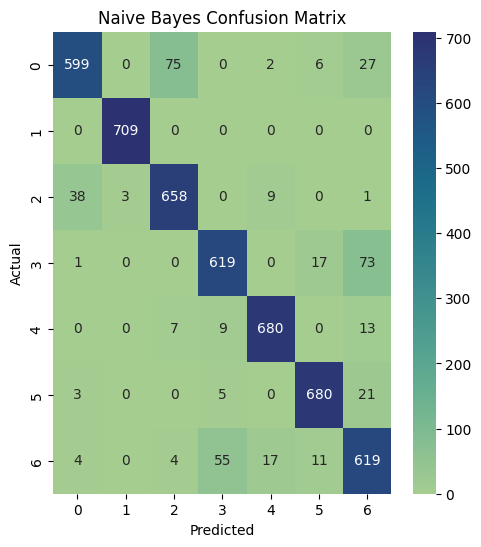

In [260]:
# Plotting the confusion matrix for Naive Bayes Model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sbn.heatmap(conf_matrix_GNB, annot=True, fmt='d', cmap='crest')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [261]:
#Confusion matrix for logistic regression Model
conf_matrix_LOR=confusion_matrix(y_test,y_prediction_LOR)
print(conf_matrix_LOR)

[[651   0  32   0   1   6  19]
 [  0 709   0   0   0   0   0]
 [ 13   0 681   0   9   0   6]
 [  1   0   0 620   1  15  73]
 [  0   0  10   8 679   0  12]
 [  4   0   0   4   0 685  16]
 [  2   0   1  53  16  14 624]]


In [262]:
falsePositive1 = conf_matrix_LOR.sum(axis=0) - np.diag(conf_matrix_LOR)
falseNegative1 = conf_matrix_LOR.sum(axis=1) - np.diag(conf_matrix_LOR)
truePositive1 = np.diag(conf_matrix_LOR)
trueNegative1 = conf_matrix_LOR.sum() - (falsePositive1 + falseNegative1 + truePositive1)
print('************* Logistic Regression *************')
for i in range(len(truePositive1)):
    print(f"Class {i}:")
    print(f"truePositive: {truePositive1[i]}, falsePositive: {falsePositive1[i]}, falseNegative: {falseNegative1[i]}, trueNegative: {trueNegative1[i]}")
    print()

************* Logistic Regression *************
Class 0:
truePositive: 651, falsePositive: 20, falseNegative: 58, trueNegative: 4236

Class 1:
truePositive: 709, falsePositive: 0, falseNegative: 0, trueNegative: 4256

Class 2:
truePositive: 681, falsePositive: 43, falseNegative: 28, trueNegative: 4213

Class 3:
truePositive: 620, falsePositive: 65, falseNegative: 90, trueNegative: 4190

Class 4:
truePositive: 679, falsePositive: 27, falseNegative: 30, trueNegative: 4229

Class 5:
truePositive: 685, falsePositive: 35, falseNegative: 24, trueNegative: 4221

Class 6:
truePositive: 624, falsePositive: 126, falseNegative: 86, trueNegative: 4129



Text(120.72222222222221, 0.5, 'Actual')

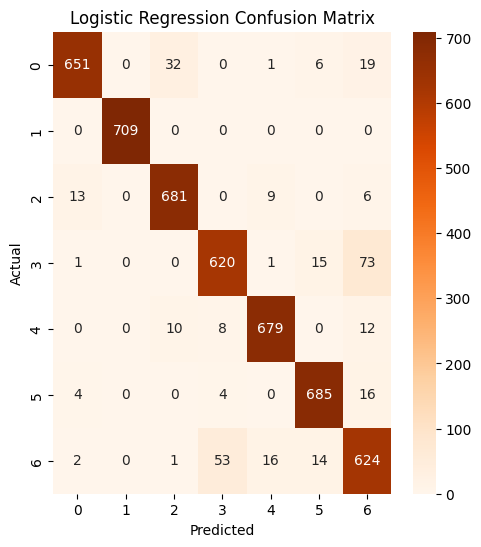

In [263]:
# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sbn.heatmap(conf_matrix_LOR, annot=True, fmt='d', cmap='Oranges')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## Task 7:- Write some conclusion commenting which model is better and why ? [1M] 

#### Conclusion:
Between the two models, Logistic Regression outperforms Naive Bayes based on the analysis of the confusion matrices and key metrics.

Reasons why Logistic Regression is better:
Higher True Positive Rates: Logistic Regression consistently shows higher true positive counts across most classes. This indicates that it is more effective at correctly identifying positive instances.

Lower False Positive and False Negative Rates: Logistic Regression typically has fewer false positives and false negatives, which means it makes fewer mistakes in classifying instances as positive or negative. This contributes to better precision and recall.

Better Precision and Recall: With fewer classification errors (both false positives and false negatives), Logistic Regression achieves higher precision and recall, which are crucial for tasks where correct classification is important.

Consistency Across Classes: Logistic Regression shows consistent performance improvements across nearly all classes, making it a more reliable model overall.

Summary:

Logistic Regression is the better model because it provides more accurate and reliable classifications with fewer errors, making it more suitable for this particular task. Its superior performance in terms of true positives, precision, and recall indicates that it will generally provide more dependable results compared to Naive Bayes.